In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df1 = pd.read_csv('US_City_Temp_Data.csv')
print(len(df1))

899


In [52]:
df2 = pd.read_csv('daily_rainfall_flags_removed.csv')
print(len(df2))

269657


In [51]:
df3 = pd.read_csv('Historical_Tornado_Tracks.csv')
print(len(df3))

57988


In [6]:
#beginning with analysis of temp change in America
df1.head()

,time,albuquerque,anchorage,atlanta,boise,boston,buffalo,charlotte,chicago,dallas,...,portland,rapid_city,reno,richmond,sacramento,salt_lake_city,san_antonio,san_francisco,seattle,tampa
0,1948-01-01,-0.440002,-5.979980,3.420013,-0.600006,-5.989990,-7.790009,2.390015,-7.339996,4.529999,...,3.920013,-4.029999,0.250000,0.170013,9.610016,-2.919983,8.619995,11.950012,4.380005,15.000000
1,1948-02-01,1.649994,-9.000000,9.110016,0.130005,-4.350006,-4.549988,6.670013,-3.139984,8.589996,...,4.029999,-5.549988,-3.160004,4.690002,8.679993,-1.850006,12.649994,10.020020,4.260010,19.070007
2,1948-03-01,3.470001,-5.850006,13.640015,2.309998,2.410004,1.160004,12.520020,2.950012,12.640015,...,6.220001,-1.250000,-2.100006,11.270020,10.160004,-1.179993,16.970001,10.320007,6.450012,21.959991
3,1948-04-01,13.240021,-0.269989,18.660004,7.250000,8.130005,8.690002,17.279999,12.149994,21.869995,...,8.100006,9.480011,0.929993,15.209991,12.640015,6.790009,23.420013,11.510010,8.130005,22.839996
4,1948-05-01,16.910004,6.730011,21.540009,11.860016,12.770020,11.320007,20.619995,13.700012,23.800018,...,12.230011,13.270020,5.119995,19.500000,16.119995,11.800018,26.520020,12.760010,12.119995,25.380005


In [7]:
print(df1.columns)

Index(['time', 'albuquerque', 'anchorage', 'atlanta', 'boise', 'boston',
       'buffalo', 'charlotte', 'chicago', 'dallas', 'denver', 'detroit',
       'helena', 'honolulu', 'indianapolis', 'jacksonville', 'kansas_city',
       'las_vegas', 'los_angeles', 'memphis', 'miami', 'minneapolis',
       'new_orleans', 'new_york', 'oklahoma_city', 'phoenix', 'portland',
       'rapid_city', 'reno', 'richmond', 'sacramento', 'salt_lake_city',
       'san_antonio', 'san_francisco', 'seattle', 'tampa'],
      dtype='object')


In [8]:
#going to use Boston, Dallas, and Boise as American sample size. this is because it represents east coast, midwest, and west coast respectively.

In [9]:
min_boston = df1['boston'].min()
max_boston = df1['boston'].max()
print("Min Boston: ", min_boston)
print("Max Boston: ", max_boston, "\n")

min_dallas = df1['dallas'].min()
max_dallas = df1['dallas'].max()
print("Min Dallas: ", min_dallas)
print("Max Dallas: ", max_dallas, "\n")

min_boise = df1['boise'].min()
max_boise = df1['boise'].max()
print("Min Boise: ", min_boise)
print("Max Boise: ", max_boise)

Min Boston:  -8.088379
Max Boston:  24.794373 

Min Dallas:  2.0200195
Max Dallas:  34.48056 

Min Boise:  -13.589996
Max Boise:  26.53537


In [10]:
#since values include all 12 months of the year, data needs to be filtered for only one month at a time to be able to compare min and max temp values

In [11]:
allJan = df1[df1['time'].str[5:7] == '01']

In [12]:
Jan = allJan[['time', 'boston', 'dallas', 'boise']]

In [13]:
#the data is filtered now so that only our sample of boston, dallas, and boise are shown along with the time column
Jan.head(200)

,time,boston,dallas,boise
0,1948-01-01,-5.989990,4.529999,-0.600006
12,1949-01-01,0.750000,4.970001,-13.589996
24,1950-01-01,1.480011,10.119995,-4.799988
36,1951-01-01,-0.350006,8.429993,-2.389984
48,1952-01-01,-0.729980,12.970001,-4.359985
60,1953-01-01,0.350006,11.510010,3.959992
72,1954-01-01,-4.100006,8.510010,1.320007
84,1955-01-01,-3.070007,8.570007,-5.130005
96,1956-01-01,-1.949982,8.020020,-0.389984
108,1957-01-01,-5.979980,7.380005,-7.019989


In [14]:
min_boston = Jan['boston'].min()
min_boston_time = Jan['time'][Jan['boston'].idxmin]
max_boston = Jan['boston'].max()
max_boston_time = Jan['time'][Jan['boston'].idxmax]
print("Min Boston: ", min_boston, "on: ", min_boston_time)
print("Max Boston: ", max_boston, "on: ", max_boston_time, "\n")

min_dallas = Jan['dallas'].min()
min_dallas_time = Jan['time'][Jan['dallas'].idxmin]
max_dallas = Jan['dallas'].max()
max_dallas_time = Jan['time'][Jan['dallas'].idxmax]
print("Min Dallas: ", min_dallas, "on: ", min_dallas_time)
print("Max Dallas: ", max_dallas, "on: ", max_dallas_time, "\n")

min_boise = Jan['boise'].min()
min_boise_time = Jan['time'][Jan['boise'].idxmin]
max_boise = Jan['boise'].max()
max_boise_time = Jan['time'][Jan['boise'].idxmax]
print("Min Boise: ", min_boise, "on: ", min_boise_time)
print("Max Boise: ", max_boise, "on: ", max_boise_time)

Min Boston:  -7.440002400000001 on:  1981-01-01
Max Boston:  1.7900085 on:  2006-01-01 

Min Dallas:  2.0200195 on:  1978-01-01
Max Dallas:  13.080017 on:  2006-01-01 

Min Boise:  -13.589996 on:  1949-01-01
Max Boise:  3.9599915 on:  1953-01-01


In [15]:
boston_jan = allJan[['time', 'boston']]
boston_jan.head()

,time,boston
0,1948-01-01,-5.989990
12,1949-01-01,0.750000
24,1950-01-01,1.480011
36,1951-01-01,-0.350006
48,1952-01-01,-0.729980


In [16]:
#filters data from min to max for Boston
boston_jan_min = allJan[['time', 'boston']].sort_values(by=['boston'])
boston_jan_min.head()

,time,boston
396,1981-01-01,-7.440002
264,1970-01-01,-7.410004
348,1977-01-01,-7.100006
672,2004-01-01,-6.959991
408,1982-01-01,-6.729980


In [17]:
#filters data from max to min for Boston
boston_jan_max = boston_jan.sort_values(by=['boston'], ascending = [False])
boston_jan_max.head()

,time,boston
696,2006-01-01,1.790008
24,1950-01-01,1.480011
864,2020-01-01,1.414398
504,1990-01-01,1.399994
648,2002-01-01,1.360016


In [18]:
dallas_jan = allJan[['time', 'dallas']]
dallas_jan.head()

,time,dallas
0,1948-01-01,4.529999
12,1949-01-01,4.970001
24,1950-01-01,10.119995
36,1951-01-01,8.429993
48,1952-01-01,12.970001


In [19]:
#filters data from min to max for Dallas
dallas_jan_min = allJan[['time', 'dallas']].sort_values(by=['dallas'])
dallas_jan_min.head()

,time,dallas
360,1978-01-01,2.020020
372,1979-01-01,2.369995
348,1977-01-01,2.760010
180,1963-01-01,4.070007
444,1985-01-01,4.440002


In [20]:
#filters data from max to min for Dallas
dallas_jan_max = dallas_jan.sort_values(by=['dallas'], ascending = [False])
dallas_jan_max.head()

,time,dallas
696,2006-01-01,13.080017
48,1952-01-01,12.970001
504,1990-01-01,11.850006
60,1953-01-01,11.510010
828,2017-01-01,10.952148


In [21]:
boise_jan = allJan[['time', 'boise']]
boise_jan.head()

,time,boise
0,1948-01-01,-0.600006
12,1949-01-01,-13.589996
24,1950-01-01,-4.799988
36,1951-01-01,-2.389984
48,1952-01-01,-4.359985


In [22]:
#filters data from min to max for Boise
boise_jan_min = allJan[['time', 'boise']].sort_values(by=['boise'])
boise_jan_min.head()

,time,boise
12,1949-01-01,-13.589996
372,1979-01-01,-9.209991
444,1985-01-01,-7.440002
108,1957-01-01,-7.019989
780,2013-01-01,-6.968750


In [23]:
#filters data from max to min for Boise
boise_jan_max = boise_jan.sort_values(by=['boise'], ascending = [False])
boise_jan_max.head()

,time,boise
60,1953-01-01,3.959992
840,2018-01-01,3.204834
660,2003-01-01,2.899994
600,1998-01-01,2.369995
744,2010-01-01,1.779999


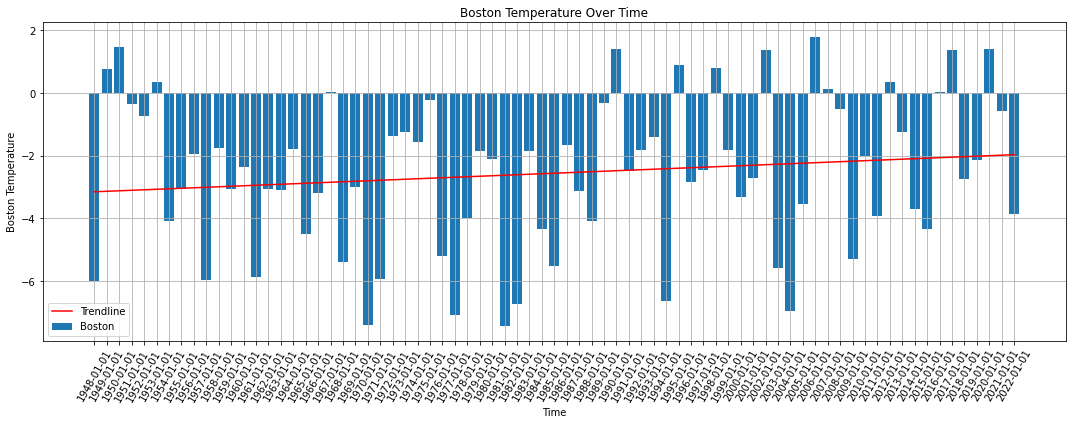

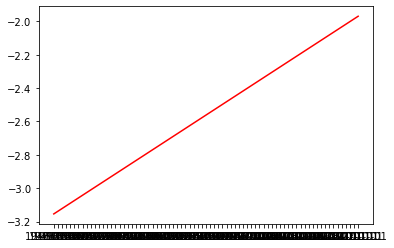

In [24]:
plt.figure(figsize=(15, 6))
plt.bar(boston_jan['time'], boston_jan['boston'], label='Boston')

z = np.polyfit(range(len(boston_jan)), boston_jan['boston'], 1)
p = np.poly1d(z)
plt.plot(boston_jan['time'], p(range(len(boston_jan))), color='red', label='Trendline')

plt.xlabel('Time')
plt.ylabel('Boston Temperature')
plt.title('Boston Temperature Over Time')
plt.xticks(rotation=60)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

z = np.polyfit(range(len(boston_jan)), boston_jan['boston'], 1)
p = np.poly1d(z)

plt.plot(boston_jan['time'], p(range(len(boston_jan))), color='red')

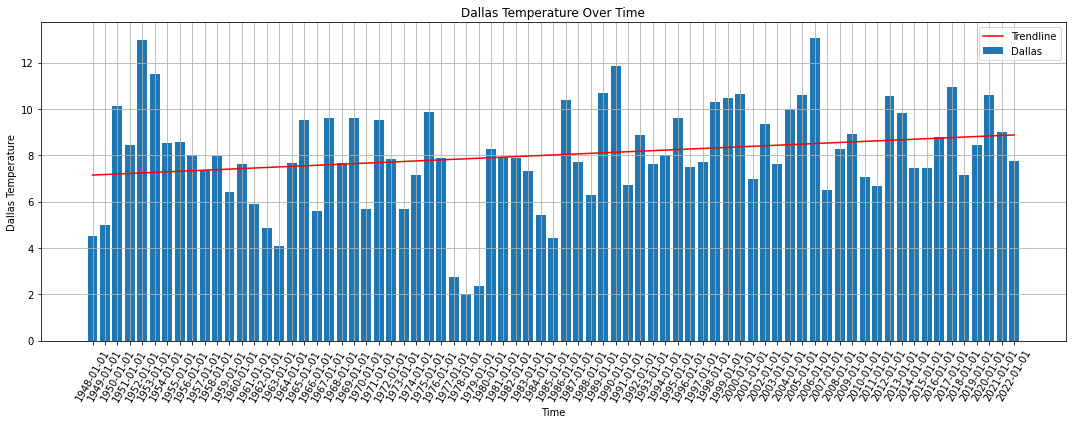

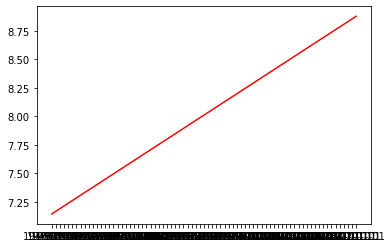

In [25]:
plt.figure(figsize=(15, 6))
plt.bar(dallas_jan['time'], dallas_jan['dallas'], label='Dallas')

z = np.polyfit(range(len(dallas_jan)), dallas_jan['dallas'], 1)
p = np.poly1d(z)
plt.plot(dallas_jan['time'], p(range(len(dallas_jan))), color='red', label='Trendline')

plt.xlabel('Time')
plt.ylabel('Dallas Temperature')
plt.title('Dallas Temperature Over Time')
plt.xticks(rotation=60)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

z = np.polyfit(range(len(dallas_jan)), dallas_jan['dallas'], 1)
p = np.poly1d(z)

plt.plot(dallas_jan['time'], p(range(len(dallas_jan))), color='red')

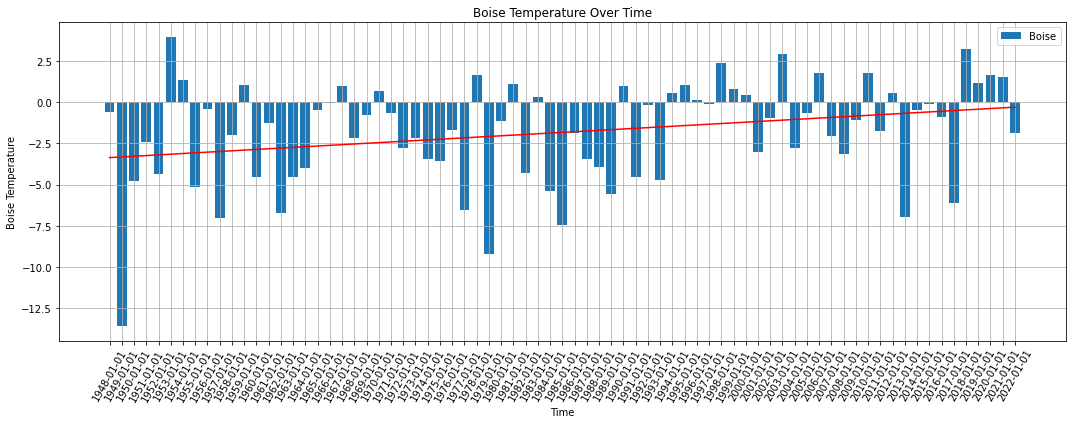

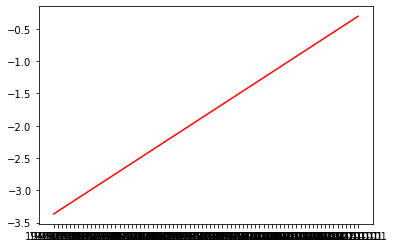

In [26]:
plt.figure(figsize=(15, 6))

plt.bar(boise_jan['time'], boise_jan['boise'], label='Boise')

z = np.polyfit(range(len(boise_jan)), boise_jan['boise'], 1)
p = np.poly1d(z)

plt.plot(boise_jan['time'], p(range(len(boise_jan))), color='red')

plt.xlabel('Time')
plt.ylabel('Boise Temperature')
plt.title('Boise Temperature Over Time')
plt.xticks(rotation=60) 

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

z = np.polyfit(range(len(boise_jan)), boise_jan['boise'], 1)
p = np.poly1d(z)

plt.plot(boise_jan['time'], p(range(len(boise_jan))), color='red')

In [27]:
#all three different areas in the sample of east coast, midwest, and west coast show an upward trend in temperature between 1.2 to 3 degrees warmer

In [28]:
#analysis of rainfall in America
df2.head()

,station_id,state_code,station_list_no,network_div_no,element_units,date,hour,rainfall,state
0,22079200,22,792,0,HI,1955-12-03,2500,297,Mississippi
1,22079200,22,792,0,HI,1955-12-04,2500,22,Mississippi
2,22079200,22,792,0,HI,1955-12-05,2500,9,Mississippi
3,22079200,22,792,0,HI,1955-12-06,2500,26,Mississippi
4,22079200,22,792,0,HI,1955-12-18,2500,83,Mississippi


In [29]:
unique_states = df2['state'].unique()
print(unique_states)

['Mississippi' 'Massachusetts' 'Minnesota' 'New Mexico' 'Kansas'
 'Indiaina' 'Wisconsin' 'Texas' 'Navada' 'Virginia' 'Iowa' 'South Dakota'
 'Montana' 'Utah' 'Louisiana' 'Maine' 'Hawaii' 'Ohio' 'New York'
 'Pennsylvania' 'Nebraska' 'Missouri' 'New Jersey' 'Illinois' 'Kentucky'
 'Washington' 'Puerto Rico' 'Wyoming' 'Michigan' 'Alaska' 'Oregon'
 'North Carolina' 'North Dakota' 'Oklahoma' 'Idaho' 'New Hampshire'
 'Tennessee' 'West Virginia' 'Maryland' 'Pacific Islands' 'Vermont'
 'Virgin Islands' 'South Carolina']


In [30]:
#we will use Washington, Oklahoma, and Massachusetts as our sample to represent west coast, midwest, and east coast respectively
df2 = df2[(df2['state'] == 'Washington') | (df2['state'] == 'Oklahoma') | (df2['state'] == 'Massachusetts')]
rainfall = df2[['date', 'rainfall', 'state']]
rainfall.head()

,date,rainfall,state
1177,1948-05-01,0,Massachusetts
1178,1948-05-05,15,Massachusetts
1179,1948-05-07,70,Massachusetts
1180,1948-05-08,11,Massachusetts
1181,1948-05-13,42,Massachusetts


In [31]:
mass_rainfall = rainfall[rainfall['state'] == 'Massachusetts']
mass_rainfall.head()

,date,rainfall,state
1177,1948-05-01,0,Massachusetts
1178,1948-05-05,15,Massachusetts
1179,1948-05-07,70,Massachusetts
1180,1948-05-08,11,Massachusetts
1181,1948-05-13,42,Massachusetts


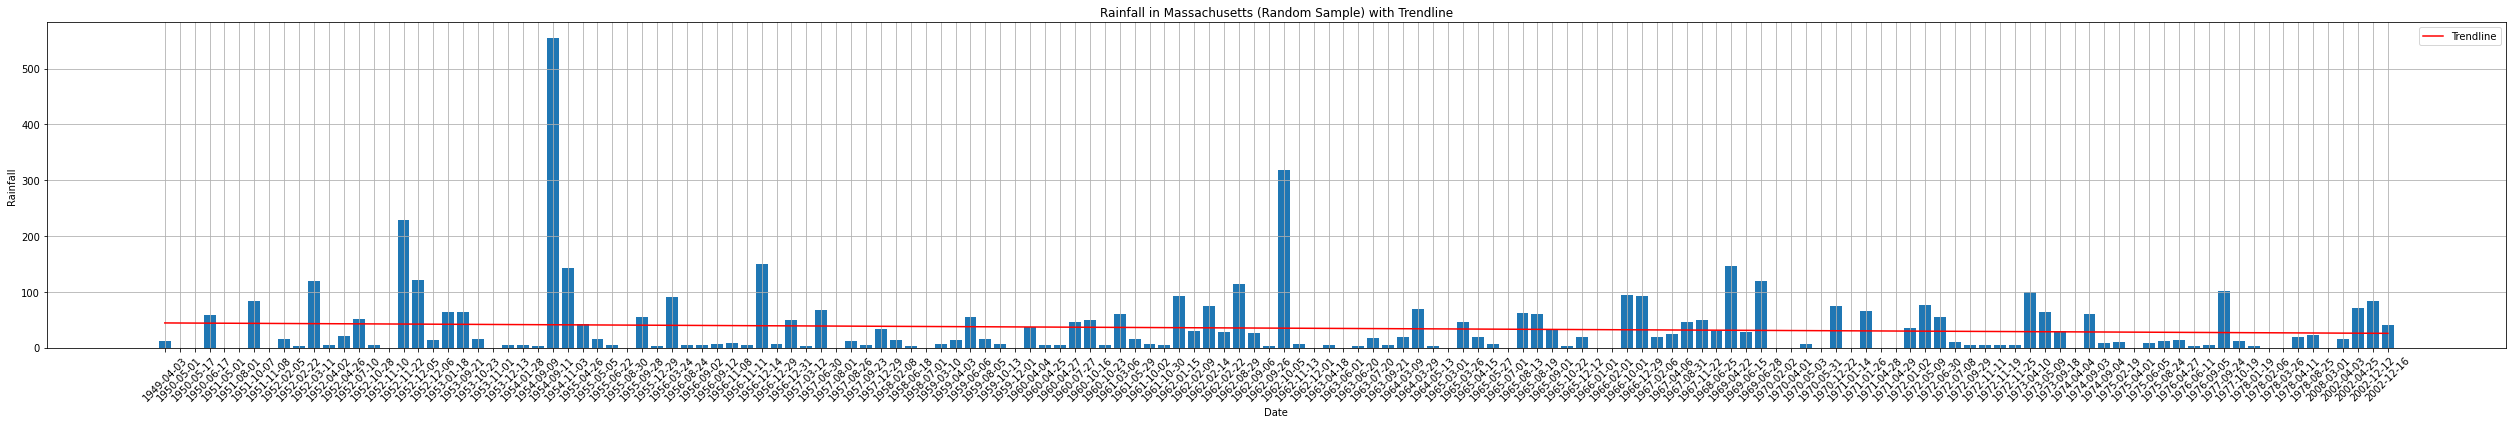

In [32]:
import random

sample_size = 150
sample_indices = random.sample(range(len(mass_rainfall)), sample_size)

sample_indices.sort()

sample_df = mass_rainfall.iloc[sample_indices]

z = np.polyfit(range(len(sample_df)), sample_df['rainfall'], 1)
p = np.poly1d(z)

plt.figure(figsize=(35, 6))
plt.bar(sample_df['date'], sample_df['rainfall'])
plt.plot(range(len(sample_df)), p(range(len(sample_df))), color='red', label='Trendline')

plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Rainfall in Massachusetts (Random Sample) with Trendline')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend() 
plt.tight_layout()
plt.show()

In [33]:
oklahoma_rainfall = rainfall[rainfall['state'] == 'Oklahoma']
oklahoma_rainfall.head()

,date,rainfall,state
11311,2004-01-25,20,Oklahoma
11312,2004-02-01,20,Oklahoma
11313,2004-02-04,120,Oklahoma
11314,2004-02-05,10,Oklahoma
11315,2004-02-09,10,Oklahoma


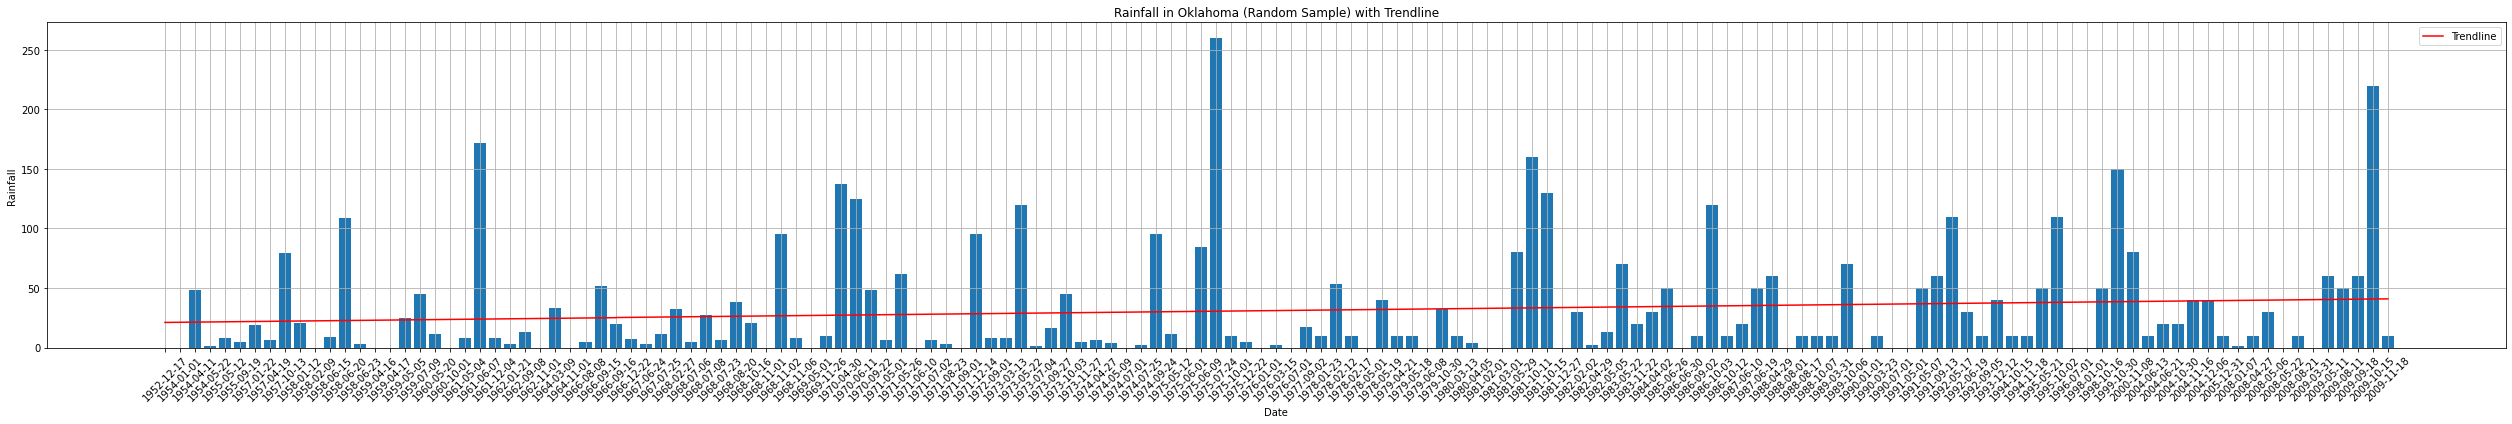

In [34]:
sample_df = oklahoma_rainfall.sample(n=150).sort_values('date')

z = np.polyfit(range(len(sample_df)), sample_df['rainfall'], 1)
p = np.poly1d(z)

plt.figure(figsize=(35, 6))
plt.bar(sample_df['date'], sample_df['rainfall'])
plt.plot(sample_df['date'], p(range(len(sample_df))), color='red', label='Trendline')

plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Rainfall in Oklahoma (Random Sample) with Trendline')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
washington_rainfall = rainfall[rainfall['state'] == 'Washington']
washington_rainfall.head()

,date,rainfall,state
6798,2006-01-02,20,Washington
6799,2006-01-03,30,Washington
6800,2006-01-04,10,Washington
6801,2006-01-06,60,Washington
6802,2006-01-07,30,Washington


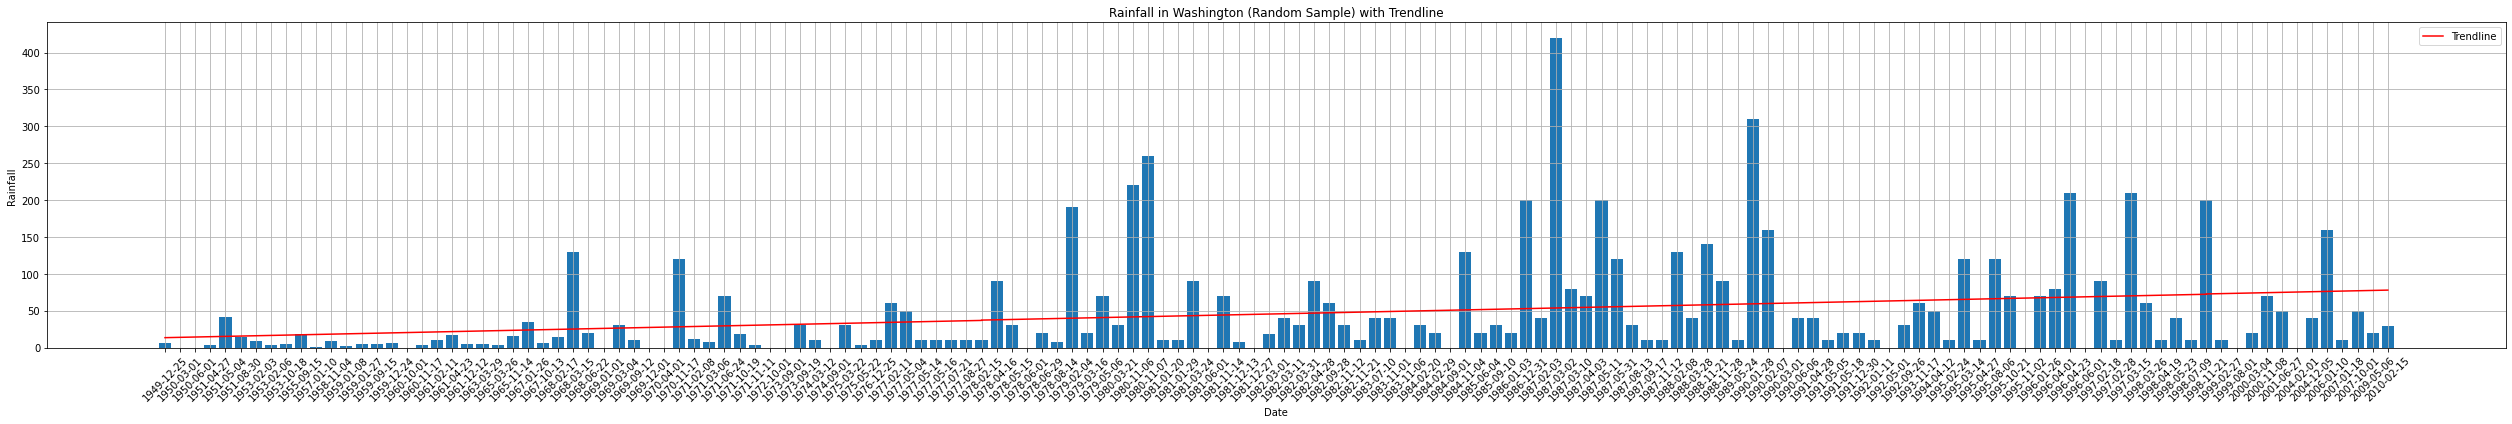

In [36]:
sample_df = washington_rainfall.sample(n=150).sort_values('date')

z = np.polyfit(range(len(sample_df)), sample_df['rainfall'], 1)
p = np.poly1d(z)

plt.figure(figsize=(35, 6))
plt.bar(sample_df['date'], sample_df['rainfall'])
plt.plot(sample_df['date'], p(range(len(sample_df))), color='red', label='Trendline')

plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Rainfall in Washington (Random Sample) with Trendline')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
#all three different areas in the sample of east coast, midwest, and west coast show an upward trend in precipitation

In [38]:
#analysis of tornadoes in North America
df3.head()

,index,FID,OM,YR,MO,DY,DATE,TIME,TZ,ST,...,FAT,LOSS,CLOSS,SLAT,SLON,ELAT,ELON,LEN,WID,Shape_Leng
0,0,2001,141,2002,6,5,2002-06-05,16:45:00,3,FL,...,0,0.000,0.0,28.08,-82.78,28.08,-82.78,0.1,20,0.000000
1,1,2002,142,2002,6,8,2002-06-08,13:40:00,3,FL,...,0,0.500,0.0,27.73,-82.73,27.72,-82.75,1.0,40,0.022361
2,2,2003,145,2002,6,17,2002-06-17,16:40:00,3,FL,...,0,0.000,0.0,27.48,-82.72,27.48,-82.72,0.1,20,0.000000
3,3,2004,187,2002,7,11,2002-07-11,12:30:00,3,FL,...,0,0.020,0.0,27.77,-82.77,27.77,-82.77,0.5,40,0.000000
4,4,2005,188,2002,7,12,2002-07-12,06:30:00,3,FL,...,0,0.001,0.0,27.92,-82.80,27.92,-82.80,0.5,40,0.000000


In [39]:
print(df3.columns)

Index(['index', 'FID', 'OM', 'YR', 'MO', 'DY', 'DATE', 'TIME', 'TZ', 'ST',
       'STF', 'STN', 'MAG', 'INJ', 'FAT', 'LOSS', 'CLOSS', 'SLAT', 'SLON',
       'ELAT', 'ELON', 'LEN', 'WID', 'Shape_Leng'],
      dtype='object')


In [40]:
tornados = df3[['DATE', 'MAG']]
tornados.head()

,DATE,MAG
0,2002-06-05,0
1,2002-06-08,0
2,2002-06-17,0
3,2002-07-11,0
4,2002-07-12,0


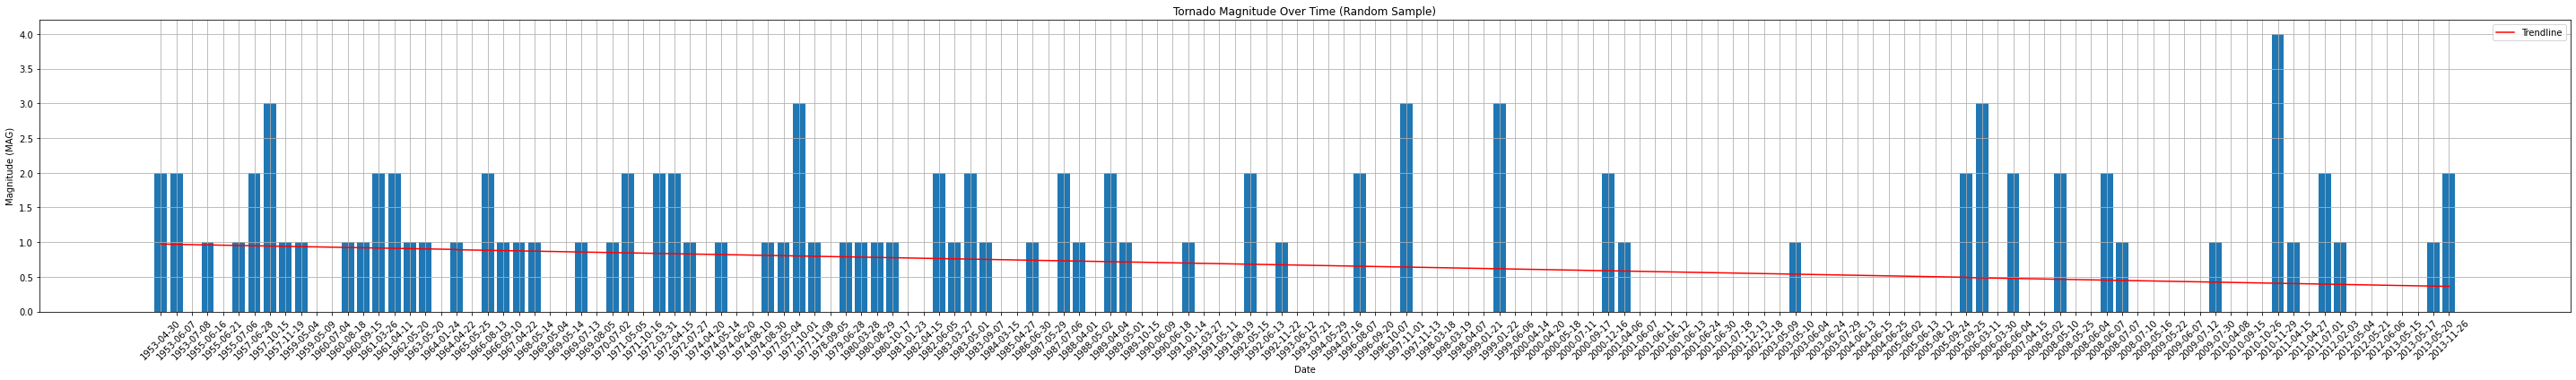

In [49]:
sample_size = 150
sample_df = tornados.sample(n=sample_size)

sample_df = sample_df.sort_values('DATE')

plt.figure(figsize=(40, 6))
plt.bar(sample_df['DATE'], sample_df['MAG'])

z = np.polyfit(range(len(sample_df)), sample_df['MAG'], 1)
p = np.poly1d(z)
plt.plot(sample_df['DATE'], p(range(len(sample_df))), color='red', label='Trendline')

plt.xlabel('Date')
plt.ylabel('Magnitude (MAG)')
plt.title('Tornado Magnitude Over Time (Random Sample)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#according to random samples of tornados in North America, there is a downward trend in magnitude of the tornados